# Task
Tell me about this dataset.

Here is all the data you need:
"movies.csv"

## Data loading

### Subtask:
Load the movie dataset.


**Reasoning**:
I need to load the movie dataset and display the first few rows and the shape of the DataFrame to verify the data is loaded correctly.



In [1]:
import pandas as pd

try:
    movies_df = pd.read_csv('theatre_cleaned.csv')
    display(movies_df.head())
    print(movies_df.shape)
except FileNotFoundError:
    print("Error: 'theatre_cleaned.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,city,theatre_name,average_ticket_price,total_seats,no_screens,type,lat,lon,source_of_information
0,Ahmedabad,"AB Miniplex: Shivranjini Cross Road, Satellite",125.619048,302,3,1,23.024940,72.529380,BookMyShow
1,Ahmedabad,Amber Cinema: Ahmedabad,100.833333,763,1,0,23.034310,72.620020,BookMyShow
2,Ahmedabad,Anupam Cinema: Ahmedabad,125.833333,781,1,0,23.006560,72.613330,BookMyShow
3,Ahmedabad,"Apsara Cinema, Behrampura",149.094915,1117,1,0,23.003974,72.597468,MediaAnt
4,Ahmedabad,"Aradhana Cinema, Behrampura",149.094915,455,1,0,23.003960,72.597520,MediaAnt


(578, 9)


## Data visualization

### Subtask:
Visualize the distributions of key numerical and categorical features in the movie dataset.


**Reasoning**:
Visualize the distributions of key numerical and categorical features using histograms, box plots, and bar charts.



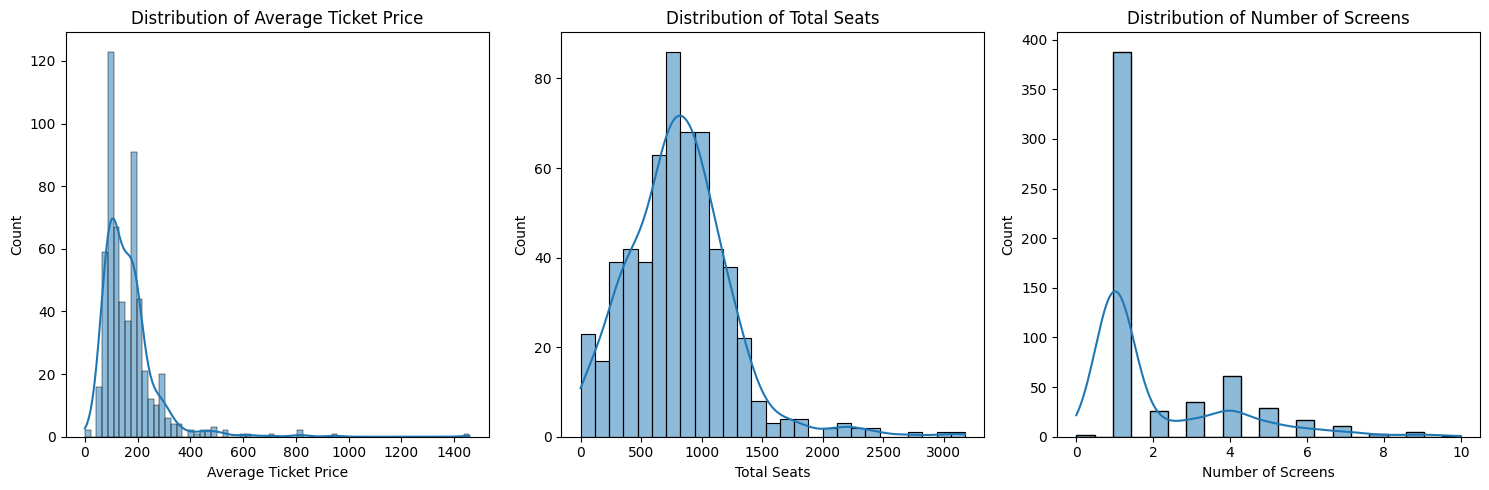

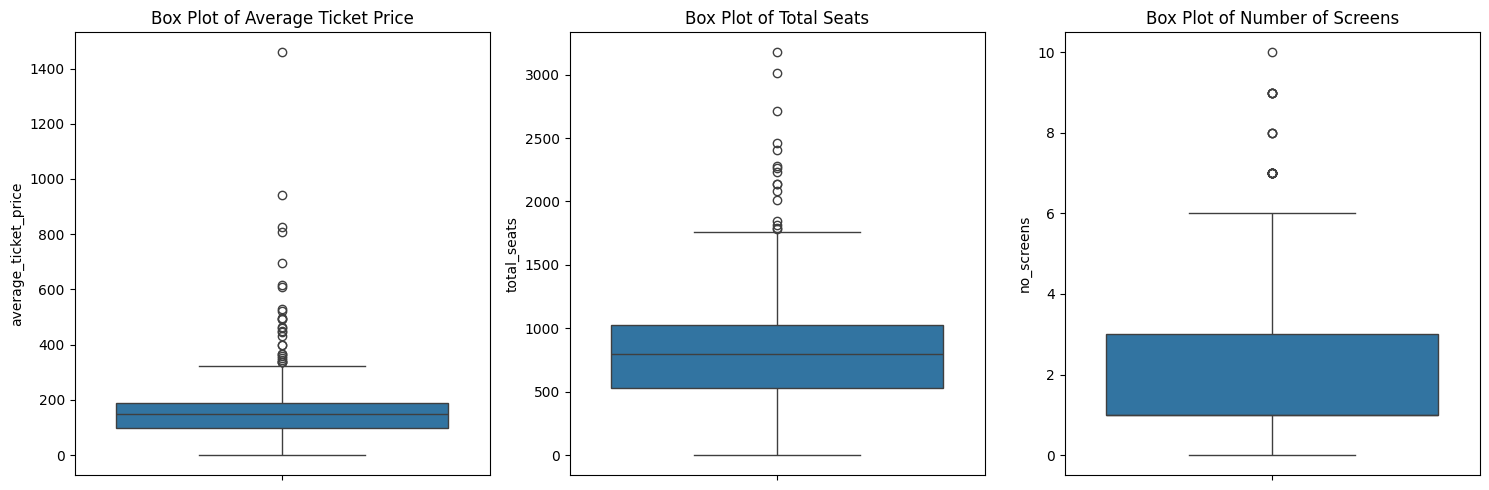

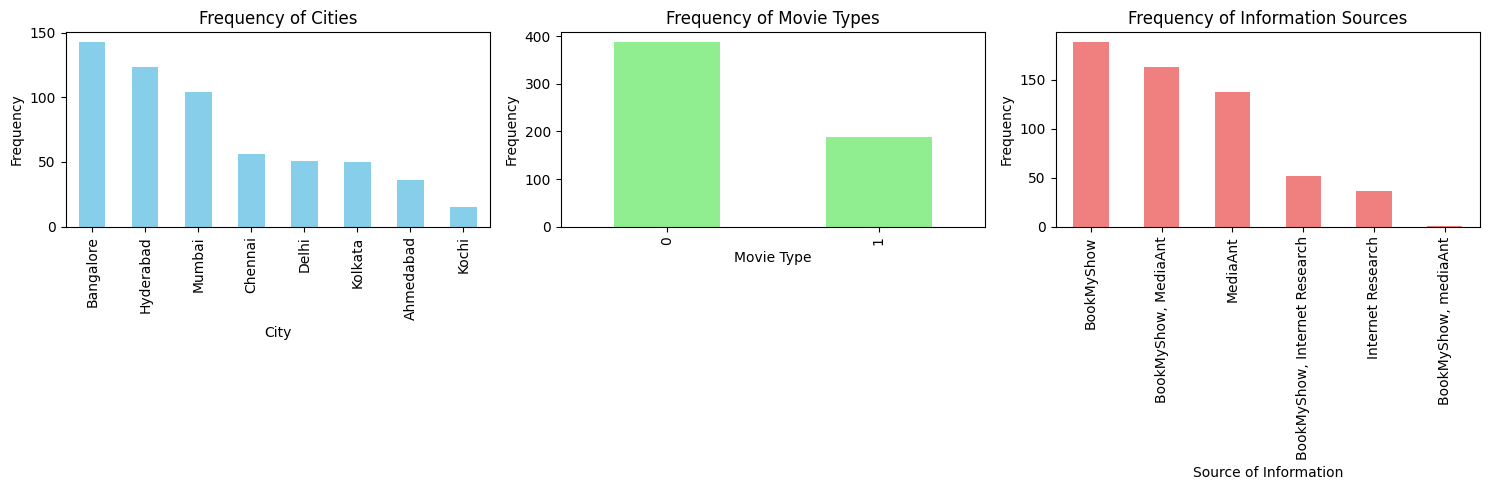

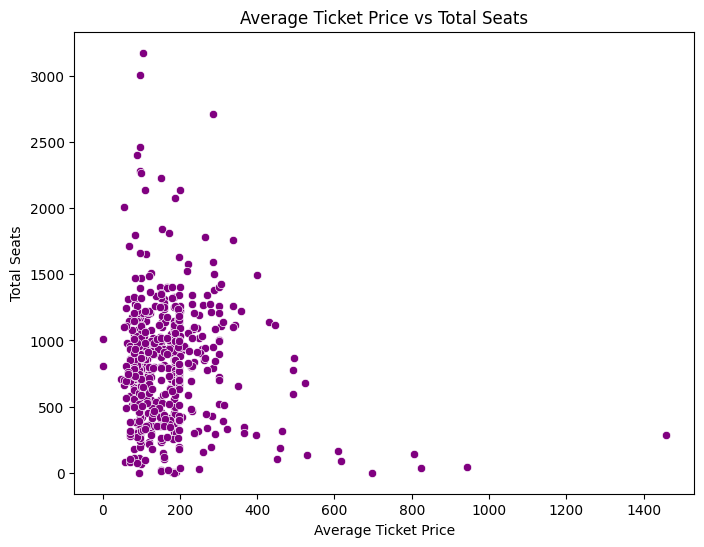

<Figure size 1200x600 with 0 Axes>

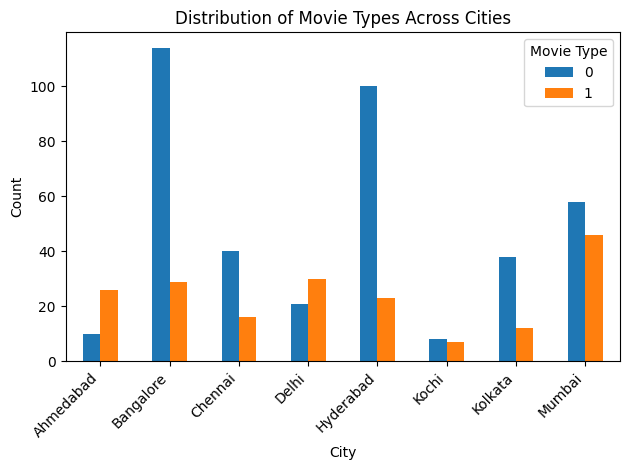

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(movies_df['average_ticket_price'], kde=True)
plt.title('Distribution of Average Ticket Price')
plt.xlabel('Average Ticket Price')

plt.subplot(1, 3, 2)
sns.histplot(movies_df['total_seats'], kde=True)
plt.title('Distribution of Total Seats')
plt.xlabel('Total Seats')

plt.subplot(1, 3, 3)
sns.histplot(movies_df['no_screens'], kde=True)
plt.title('Distribution of Number of Screens')
plt.xlabel('Number of Screens')
plt.tight_layout()
plt.show()


# Box plots for numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=movies_df['average_ticket_price'])
plt.title('Box Plot of Average Ticket Price')

plt.subplot(1, 3, 2)
sns.boxplot(y=movies_df['total_seats'])
plt.title('Box Plot of Total Seats')

plt.subplot(1, 3, 3)
sns.boxplot(y=movies_df['no_screens'])
plt.title('Box Plot of Number of Screens')
plt.tight_layout()
plt.show()


# Bar charts for categorical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
movies_df['city'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Cities')
plt.xlabel('City')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
movies_df['type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Movie Types')
plt.xlabel('Movie Type')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
movies_df['source_of_information'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Information Sources')
plt.xlabel('Source of Information')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Scatter plot of average ticket price vs total seats
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_ticket_price', y='total_seats', data=movies_df, color='purple')
plt.title('Average Ticket Price vs Total Seats')
plt.xlabel('Average Ticket Price')
plt.ylabel('Total Seats')
plt.show()


# Grouped bar chart showing the distribution of type across different cities
plt.figure(figsize=(12, 6))
city_type_counts = movies_df.groupby(['city', 'type']).size().unstack(fill_value=0)
city_type_counts.plot(kind='bar', stacked=False)
plt.title('Distribution of Movie Types Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Movie Type')
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:


# Handle missing values (example: fill with mean)
for col in movies_df.select_dtypes(include=['number']):
    movies_df[col] = movies_df[col].fillna(movies_df[col].mean())

# Handle categorical missing values (example: fill with mode)
for col in movies_df.select_dtypes(include=['object']):
    movies_df[col] = movies_df[col].fillna(movies_df[col].mode()[0])

In [6]:
# Example: Create a 'profit_margin' feature
movies_df['profit_margin'] = movies_df['average_ticket_price'] * movies_df['total_seats']  # This is a simple example, you might need a more complex calculation

mportant Considerations:

Simplified Calculation: The comment in the code acknowledges that this is a simplified calculation. In reality, profit margin is more complex, involving factors like theater operating costs, movie production costs, and distribution fees.
Potential Issues: This calculation assumes all seats are sold at the average ticket price, which might not always be the case. There could be discounted tickets, unsold seats, or variations in ticket prices.

In [7]:
movies_df.head()

,city,theatre_name,average_ticket_price,total_seats,no_screens,type,lat,lon,source_of_information,profit_margin
0,Ahmedabad,"AB Miniplex: Shivranjini Cross Road, Satellite",125.619048,302,3,1,23.024940,72.529380,BookMyShow,37936.952375
1,Ahmedabad,Amber Cinema: Ahmedabad,100.833333,763,1,0,23.034310,72.620020,BookMyShow,76935.833308
2,Ahmedabad,Anupam Cinema: Ahmedabad,125.833333,781,1,0,23.006560,72.613330,BookMyShow,98275.833307
3,Ahmedabad,"Apsara Cinema, Behrampura",149.094915,1117,1,0,23.003974,72.597468,MediaAnt,166539.020191
4,Ahmedabad,"Aradhana Cinema, Behrampura",149.094915,455,1,0,23.003960,72.597520,MediaAnt,67838.186380


In [8]:
le = LabelEncoder()
for col in ['city', 'type', 'source_of_information']:  # Add other categorical columns
    movies_df[col] = le.fit_transform(movies_df[col])

In [9]:
X = movies_df[['city', 'type', 'average_ticket_price', 'profit_margin']]  # Add relevant features
y = movies_df['total_seats']  # or another target variable related to profit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
model.score(X_train, y_train)

0.6861754140061134

In [12]:
# Example: Predict total seats for a new movie showtime
new_data = pd.DataFrame({'city': [0], 'type': [1], 'average_ticket_price': [150], 'profit_margin': [5000]})  # Replace with actual values
predicted_seats = model.predict(new_data)

In [13]:
predicted_seats

array([404.87399931])

In [14]:
import pickle

# Assuming 'model' is your trained model
with open('movie_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
with open('movie_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Get data from the request

    # Extract features from the data
    city = data['city']
    movie_type = data['type']
    avg_ticket_price = data['average_ticket_price']
    profit_margin = data['profit_margin']

    # Create a DataFrame for prediction
    input_data = pd.DataFrame({'city': [city], 'type': [movie_type], 'average_ticket_price': [avg_ticket_price], 'profit_margin': [profit_margin]})

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Return the prediction as JSON
    return jsonify({'predicted_seats': prediction})

if __name__ == '__main__':
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'movie_model.pkl'

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Define features (X) and target (y)
X = movies_df[['city', 'type', 'average_ticket_price', 'profit_margin']]
y = movies_df['total_seats']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8053.135663793103
R-squared: 0.9488541738265875


In [19]:
import pickle

# Assuming 'rf_model' is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

# Load the model
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Extract features from the data
    city = data['city']
    movie_type = data['type']
    avg_ticket_price = data['average_ticket_price']
    profit_margin = data['profit_margin']

    # Create a DataFrame for prediction
    input_data = pd.DataFrame({'city': [city], 'type': [movie_type], 'average_ticket_price': [avg_ticket_price], 'profit_margin': [profit_margin]})

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Return the prediction as JSON
    return jsonify({'predicted_seats': prediction})

if __name__ == '__main__':
    app.run(debug=True)